### Memanggil Data Iris

In [36]:
import pandas as pd

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import numpy as np
import statistics as st

dataset = df['SepalLengthCm']

print(np.mean(dataset))
print(np.median(dataset))
print(st.mode(dataset))
print(np.var(dataset))
print(np.ptp(dataset))

5.843333333333334
5.8
5.0
0.6811222222222223
3.6000000000000005


### Membuat Rumus Rata-Rata

In [7]:
def avg(data):
    if not data:
        return 0
    
    valid_number = [x for x in data if isinstance(x, (int, float)) and x is not None]
    #hanya data dengan jenis int atau float yang dapat dihitung rata-ratanya
    if not valid_number:
        return 0  

    total = sum(valid_number)
    observation = len(valid_number)
    hitung_avg = total / observation
    return hitung_avg


In [12]:
rata2 = avg(df['PetalLengthCm'].tolist())
print("Rata-rata dari Petal Length (cm):", rata2)

Rata-rata dari Petal Length (cm): 3.758666666666666


### Membuat Rumus Median

In [11]:
def median(data):
    if not isinstance(data, list):
        raise TypeError("Input harus berupa list")

    # Filter hanya angka valid
    valid_number = sorted([x for x in data if isinstance(x, (int, float)) and x is not None])
    n = len(valid_number)

    if n == 0:
        return 0

    med = n // 2

    if n % 2 == 1:  # jumlah data ganjil
        return valid_number[med]
    else:  # jumlah data genap
        return (valid_number[med - 1] + valid_number[med]) / 2


In [13]:
median_data = median(df['PetalLengthCm'].tolist())
print("Median dari Petal Length (cm):", median_data)

Median dari Petal Length (cm): 4.35


### Membuat Rumus Modus

In [18]:
def modus(data):
    if not isinstance(data, list):
        raise TypeError("Input harus berupa list")

    # Ambil hanya angka valid
    valid_number = [x for x in data if isinstance(x, (int, float)) and x is not None]
    
    if not valid_number:
        return None  # atau return 0, tergantung kebutuhan

    frekuensi = {}
    for angka in valid_number:
        if angka in frekuensi:
            frekuensi[angka] += 1
        else:
            frekuensi[angka] = 1

    max_freq = max(frekuensi.values())
    hitung_modus = [angka for angka, freq in frekuensi.items() if freq == max_freq]

    # Kalau hanya satu modus, kembalikan angkanya langsung
    return hitung_modus[0] if len(hitung_modus) == 1 else hitung_modus


In [19]:
modus_data = modus(df['PetalLengthCm'].tolist())
print("Modus dari Petal Length (cm):", modus_data)

Modus dari Petal Length (cm): 1.5


### Membuat Rumus Varians

In [ ]:
def varians(data, sampel=False):
    valid_number = [x for x in data if isinstance(x, (int, float)) and x is not None]
    n = len(valid_number)
    
    if n == 0:
        return 0

    rata2 = avg(valid_number) #pake rumus rata-rata yang udah dibuat sebelumnya
    jumlah_selisih_kuadrat = sum((x - rata2) ** 2 for x in valid_number)

    if sampel and n > 1:
        return jumlah_selisih_kuadrat / (n - 1)
    else:
        return jumlah_selisih_kuadrat / n

In [21]:
varians_data = varians(df['PetalLengthCm'].tolist())
print("Varians dari Petal Length (cm):", varians_data)

Varians dari Petal Length (cm): 3.0924248888888886


### Membuat Rumus Range

In [22]:
def range(data):
    # Filter hanya angka valid
    valid_number = [x for x in data if isinstance(x, (int, float)) and x is not None]
    
    if not valid_number:
        return 0 

    return max(valid_number) - min(valid_number)


In [23]:
range_data = range(df['PetalLengthCm'].tolist())
print("Range dari Petal Length (cm):", range_data)

Range dari Petal Length (cm): 5.9


### Membuat Rumus Kuartil

In [34]:
def kuartil(data):
    valid_number = sorted([x for x in data if isinstance(x, (int, float)) and x is not None])
    n = len(valid_number)

    if n == 0:
        return (0, 0)

    if n % 2 == 0:
        bawah = valid_number[:n // 2]
        atas = valid_number[n // 2:]
    else:
        bawah = valid_number[:n // 2]
        atas = valid_number[n // 2 + 1:]

    Q1 = median(bawah) #pake rumus median yang udah dibuat sebelumnya
    Q3 = median(atas) #pake rumus median yang udah dibuat sebelumnya
    IQR = Q3 - Q1

    return Q1, Q3, IQR


In [37]:
Q1, Q3, IQR = kuartil(df['PetalLengthCm'].tolist())
print("Q1 dari Petal Length (cm):", Q1)
print("Q3 dari Petal Length (cm):", Q3)
print("IQR dari Petal Length (cm):", IQR)

Q1 dari Petal Length (cm): 1.6
Q3 dari Petal Length (cm): 5.1
IQR dari Petal Length (cm): 3.4999999999999996


### Mendeteksi Outlier

In [ ]:
#Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

#Filter Data
filtered = df.query("@lower_bound <= PetalLengthCm <= @upper_bound")

Lower bound: -3.649999999999999
Upper bound: 10.349999999999998


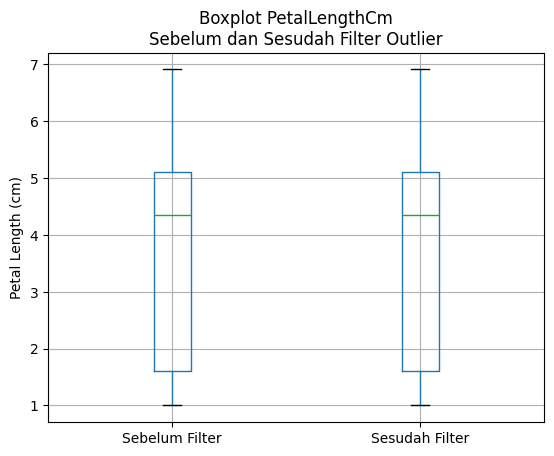

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Buat DataFrame baru untuk membandingkan data
boxplot_df = pd.DataFrame({
    'Sebelum Filter': df['PetalLengthCm'],
    'Sesudah Filter': filtered['PetalLengthCm']
})

# Buat boxplot berdampingan
boxplot_df.boxplot()
plt.title('Boxplot PetalLengthCm\nSebelum dan Sesudah Filter Outlier')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()



### Menambahkan Data Outlier

In [45]:
import pandas as pd

new_data = {
    'Id': 150,
    'SepalLengthCm': 18,
    'SepalWidthCm': 6,
    'PetalLengthCm': 15,
    'PetalWidthCm': 7,
    'Species': 'Iris-setosa'
}

#Tambahkan observasi baru ke data frame
df2 = pd.concat([df, pd.DataFrame([new_data])], ignore_index=True)

# Lihat hasil
print(df2)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   
150  150           18.0           6.0           15.0           7.0   
151  150           18.0           6.0           15.0           7.0   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
147  

### Mendeteksi Outlier di Data Terbaru

In [47]:
Q1_2, Q3_2, IQR_2 = kuartil(df2['PetalLengthCm'].tolist())
print("Q1 dari Petal Length (cm):", Q1_2)
print("Q3 dari Petal Length (cm):", Q3_2)
print("IQR dari Petal Length (cm):", IQR_2)

Q1 dari Petal Length (cm): 1.6
Q3 dari Petal Length (cm): 5.1
IQR dari Petal Length (cm): 3.4999999999999996


In [50]:
#Hitung batas bawah dan atas
lower_bound2 = Q1 - 1.5 * IQR_2
upper_bound2 = Q3 + 1.5 * IQR_2

print("Lower bound:", lower_bound2)
print("Upper bound:", upper_bound2)

#Filter Data
filtered2 = df2.query("@lower_bound <= PetalLengthCm <= @upper_bound")

Lower bound: -3.649999999999999
Upper bound: 10.349999999999998


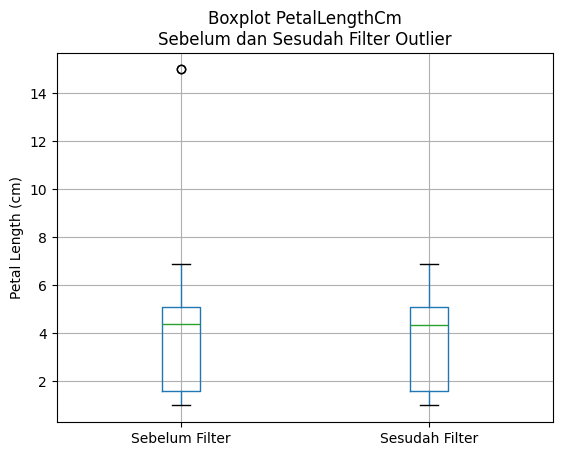

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Buat DataFrame baru untuk membandingkan data
boxplot_df2 = pd.DataFrame({
    'Sebelum Filter': df2['PetalLengthCm'],
    'Sesudah Filter': filtered2['PetalLengthCm']
})

# Buat boxplot berdampingan
boxplot_df2.boxplot()
plt.title('Boxplot PetalLengthCm\nSebelum dan Sesudah Filter Outlier')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()